# 🧠 Engenharia de Features: Criando a Variável IMC (Índice de Massa Corporal)

## 🎯 Objetivo
Demonstrar como criar uma nova feature — o **IMC (peso / altura²)** — a partir das variáveis existentes, analisando sua correlação com o target `resultado`.

## 📦 Etapa 1: Importar bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Etapa 2: Carregar e preparar os dados

In [2]:
df = pd.read_csv("exame_diabes.csv")

# Remover coluna de ID

In [3]:
df = df.drop(columns=["id_paciente"])

# One-Hot Encoding da variável categórica

In [4]:
df = pd.get_dummies(df, columns=["genero"], drop_first=True)

## 🧠 Etapa 3: Criando a nova feature: IMC
> Altura está em centímetros — precisamos converter para metros antes de calcular IMC.

In [5]:
df["altura_m"] = df["altura"] / 100
df["imc"] = df["peso"] / (df["altura_m"] ** 2)
df = df.drop(columns=["altura_m"])  # descartamos a coluna auxiliar
df.head()

,idade,peso,altura,resultado,genero_M,imc
0,46,83,165,98,True,30.486685
1,23,83,164,82,False,30.859607
2,39,71,154,93,True,29.937595
3,26,103,165,95,False,37.832874
4,27,55,176,100,True,17.755682


## 📈 Etapa 4: Análise da nova feature
### Histograma do IMC

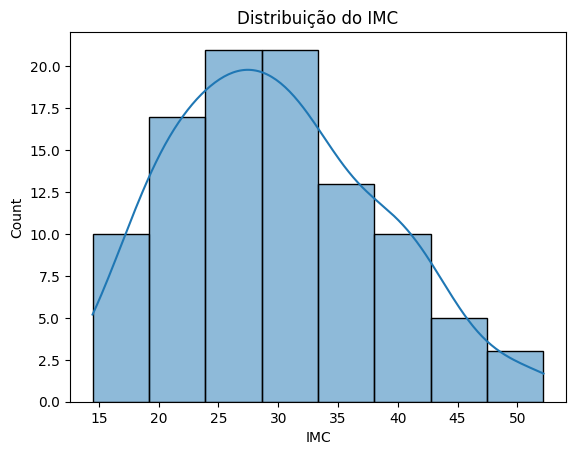

In [6]:
sns.histplot(df["imc"], kde=True)
plt.title("Distribuição do IMC")
plt.xlabel("IMC")
plt.show()

### Correlação com a variável alvo (`resultado`)

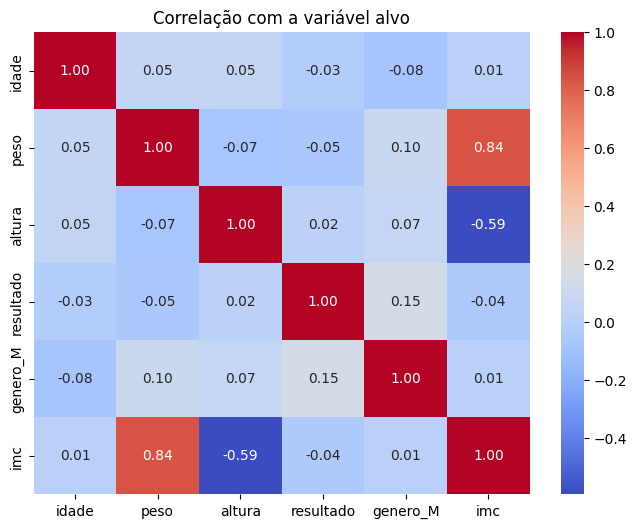

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação com a variável alvo")
plt.show()

## ✅ Conclusão

- Criamos a variável IMC usando as colunas de peso e altura.
- Mesmo com correlação fraca com a variável `resultado`, o IMC pode agregar valor ao modelo.
- Esse tipo de engenharia de features é fundamental para extrair mais significado dos dados.

> Dica: Variáveis criadas devem ser testadas com validação para confirmar impacto real no modelo.
